In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv
/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv


In [2]:
df = pd.concat((pd.read_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv',nrows = 1000000,
                                                                                                           header = 'infer',
                                                                                                           parse_dates = ['event_time'],
                                                                                                           date_parser = pd.to_datetime,),
                pd.read_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv',nrows = 1000000,
                                                                                                           header = 'infer',
                                                                                                           parse_dates = ['event_time'],
                                                                                                           date_parser = pd.to_datetime,)))

In [3]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...
999995,2019-10-01 16:56:07+00:00,view,1005115,2053013555631882655,electronics.smartphone,apple,975.56,555714787,cdbcf82e-be79-4068-a74b-e8dd93a4c581
999996,2019-10-01 16:56:07+00:00,view,26403239,2053013563651392361,NaN,NaN,77.22,514338564,c28046f7-ffda-4313-878e-b65a530f5acb
999997,2019-10-01 16:56:07+00:00,view,1307338,2053013558920217191,computers.notebook,asus,849.42,551293583,a7081bbb-82b3-4917-9e20-da3af7e00d59
999998,2019-10-01 16:56:07+00:00,view,1004873,2053013555631882655,electronics.smartphone,samsung,388.42,532714334,33e86088-8617-41c1-8e7e-2b95b033a6af


# **RQ-6**
The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?

* Find the overall conversion rate of your store.

* Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

In [4]:
#The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. 
#What's the conversion rate of your online store?
#Find the overall conversion rate of your store.

Conversion_Rate = df[(df.event_type == 'purchase')].event_type.count()/df[(df.event_type == 'view')].event_type.count()*100
print ('The overall conversion rate of the store is: %', Conversion_Rate)

The overall conversion rate of the store is: % 1.7907898692901623


In [7]:
#Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

df['category'] = df.apply( lambda x : x['category_code'].split('.')[0] if pd.notna(x['category_code']) else x['category_code'], axis = 1)
Upd_df = df.groupby(by = ['category', 'event_type']).event_type.count()
Upd_df = Upd_df.unstack()
Upd_df['Conversion_rate']= Upd_df.apply(lambda x : (x['purchase']/ x['view'])*100, axis = 1)
Upd_df.drop(columns = 'cart', inplace = True)
Upd_df.reset_index(inplace = True)
Upd_df = Upd_df.sort_values(by = ['Conversion_rate'], ascending =False)

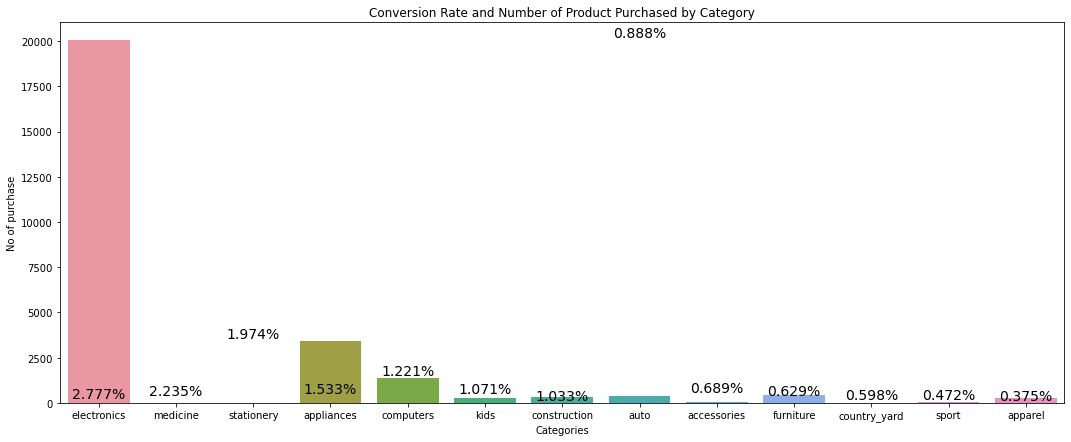

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,7))
plot = sns.barplot(x='category',y='purchase',data=Upd_df)    
for i, v in enumerate(Upd_df['Conversion_rate']):
    plt.text(i,Upd_df['purchase'][i] , '{0:.3f}'.format(v) + '%', horizontalalignment='center', verticalalignment = 'bottom', fontsize =14) 
             
plt.title('Conversion Rate and Number of Product Purchased by Category')
plt.xlabel('Categories')
plt.ylabel('No of purchase')   
plt.show()

**We have plot the number of purchases of each category and shown the conversion rate of each category in decreasing order.**